# **Business Insights Amplification** 

## **1. Business Understanding**
The project, Business Insights Amplification, aims to leverage the accumulated transactional data from the year 2019 to derive meaningful insights that empower our client to enhance sales, improve operational efficiency, and identify growth opportunities. The goal is to transform raw data into actionable intelligence, providing a comprehensive view of the business landscape.

##### **Objective:**
To design and deliver a robust end-to-end Business Intelligence solution for our client, GetINNOtized. Through meticulous analysis of the 2019 transactional data, the project aims to answer critical questions, uncover patterns, and deliver strategic recommendations.

##### **Problem Statement:**
The underutilization of 2019 transactional data poses a critical challenge for our client, hindering the identification of growth opportunities, understanding product performance, and optimizing sales strategies, thereby impeding overall sales and operational efficiency.

**The stakeholders**, including GetINNOtized Leadership, Sales and Marketing Teams, Logistics Department, Product Development Team, and Finance Department, collectively play pivotal roles in leveraging actionable insights derived from the analysis of 2019 transactional data to drive business growth, optimize sales strategies, and enhance overall operational efficiency.

**<span style="font-size: Business Analystics Question to be answered:>;">Business Analystics Question to be answered:></span>**

1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

7. You are required to show additional details from your findings in your data.

## **2. Data Understanding**

**I. Installations and Importations**

In [1]:
#Install pyodbc and python-dotenv
%pip install pyodbc  
%pip install python-dotenv
import warnings 
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
#Importing the necessary Libraries.
#import the dotenv_values function from the dotenv package
import pyodbc                    
from dotenv import dotenv_values 

#Dataloading and preparing libraries
import pandas as pd
import numpy as np
import os
import warnings 
import zipfile
import missingno as msno
#Vizualiation Libraries
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as ticker
import seaborn as sns

**II. Loading Datasets**

Loading datasets from the zipfile and database

In [3]:
#lOADING JAN - JUNE 2019 from zipfile
# Path to your zipfile
zip_path = "./datasets.zip"
# Initialize the ZipFile object
with zipfile.ZipFile(zip_path, 'r') as zip_ref:

    # Read the 'train.csv' file from the ZIP archive
    with zip_ref.open('Sales_January_2019.csv') as jan:
        jan_19 = pd.read_csv(jan)#index_col = 'date',parse_dates =True)

    with zip_ref.open('Sales_February_2019.csv') as feb:
        feb_19 = pd.read_csv(feb)#index_col = 'date',parse_dates =True)

    with zip_ref.open('Sales_March_2019.csv') as march:
        mar_19 = pd.read_csv(march)#index_col = 'date',parse_dates =True)
    with zip_ref.open('Sales_April_2019.csv') as april:
        april_19 = pd.read_csv(april)#index_col = 'date',parse_dates =True)

    with zip_ref.open('Sales_May_2019.csv') as may:
        may_19 = pd.read_csv(may)#index_col = 'date',parse_dates =True)

    with zip_ref.open('Sales_June_2019.csv') as june:
        june_19 = pd.read_csv(june)#index_col = 'date',parse_dates =True)

In [4]:
#Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")


connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [5]:
#connecting to the database
connection=pyodbc.connect(connection_string)

In [6]:
# SQL query to select data from multiple tables for the second half of 2019
query = '''
    SELECT * FROM dbo.Sales_July_2019
    WHERE [Order_Date] >= '2019-07-01' AND [Order_Date] < '2019-08-01'
    UNION ALL
    SELECT * FROM dbo.Sales_August_2019
    WHERE [Order_Date] >= '2019-08-01' AND [Order_Date] < '2019-09-01'
    UNION ALL
    SELECT * FROM dbo.Sales_September_2019
    WHERE [Order_Date] >= '2019-09-01' AND [Order_Date] < '2019-10-01'
    UNION ALL
    SELECT * FROM dbo.Sales_October_2019
    WHERE [Order_Date] >= '2019-10-01' AND [Order_Date] < '2019-11-01'
    UNION ALL
    SELECT * FROM dbo.Sales_November_2019
    WHERE [Order_Date] >= '2019-11-01' AND [Order_Date] < '2019-12-01'
    UNION ALL
    SELECT * FROM dbo.Sales_December_2019
    WHERE [Order_Date] >= '2019-12-01' AND [Order_Date] < '2020-01-01'
'''
second_half_2019=pd.read_sql(query,connection)

In [7]:
second_half_2019.head(10)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222957,AAA Batteries (4-pack),1,2.99,2019-07-19 10:11:00.0000000,"143 5th St, Portland, OR 97035"
1,222975,Wired Headphones,1,11.99,2019-07-19 16:15:00.0000000,"541 Hickory St, Los Angeles, CA 90001"
2,222990,AAA Batteries (4-pack),2,2.99,2019-07-19 18:33:00.0000000,"419 Jackson St, New York City, NY 10001"
3,223000,AAA Batteries (4-pack),1,2.99,2019-07-19 20:29:00.0000000,"670 10th St, Atlanta, GA 30301"
4,223040,Apple Airpods Headphones,1,150.00,2019-07-19 20:05:00.0000000,"395 West St, Austin, TX 73301"
5,223070,AAA Batteries (4-pack),1,2.99,2019-07-19 08:29:00.0000000,"172 Adams St, Boston, MA 02215"
6,223124,USB-C Charging Cable,1,11.95,2019-07-19 19:28:00.0000000,"593 Ridge St, San Francisco, CA 94016"
7,223174,AAA Batteries (4-pack),1,2.99,2019-07-19 18:44:00.0000000,"532 5th St, Los Angeles, CA 90001"
8,223241,USB-C Charging Cable,1,11.95,2019-07-19 20:33:00.0000000,"651 Washington St, Boston, MA 02215"
9,223254,Flatscreen TV,1,300.00,2019-07-19 20:36:00.0000000,"144 Spruce St, Austin, TX 73301"


In [9]:
#Saving the second half as CSV file
#second_half_2019.to_csv(r'C:/second_half_2019.csv', index=False)


In [44]:
#Merging the first half of 2019 dataframes.
months_sales = [jan_19, feb_19, mar_19, april_19, may_19, june_19]

# Concatenate DataFrames vertically (along rows)
first_half_2019 = pd.concat(months_sales, ignore_index=True)
first_half_2019.tail(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
85620,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
85624,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


In [46]:
# Check the number of rows in the DataFrame
num_row = second_half_2019.shape[0]
print(num_row)

3372


##### **III. Data Cleaning**
Here we are going to clean our datasets stored as first half and second half of 2019 dataframes

*merging the datasets*

In [30]:
#1. Rename Column names Second half
second_half_2019.rename(columns={'Order_ID': 'Order ID', 'Product': 'Product', 'Quantity_Ordered': 'Quantity Ordered', 'Price_Each': 'Price Each','Order_Date':'Order Date','Purchase_Address':'Purchase Address'}, inplace=True)

#2.Merge datatframes
sales_2019 = pd.concat([first_half_2019, second_half_2019], ignore_index=True)
sales_2019.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


*Checking for missing values*

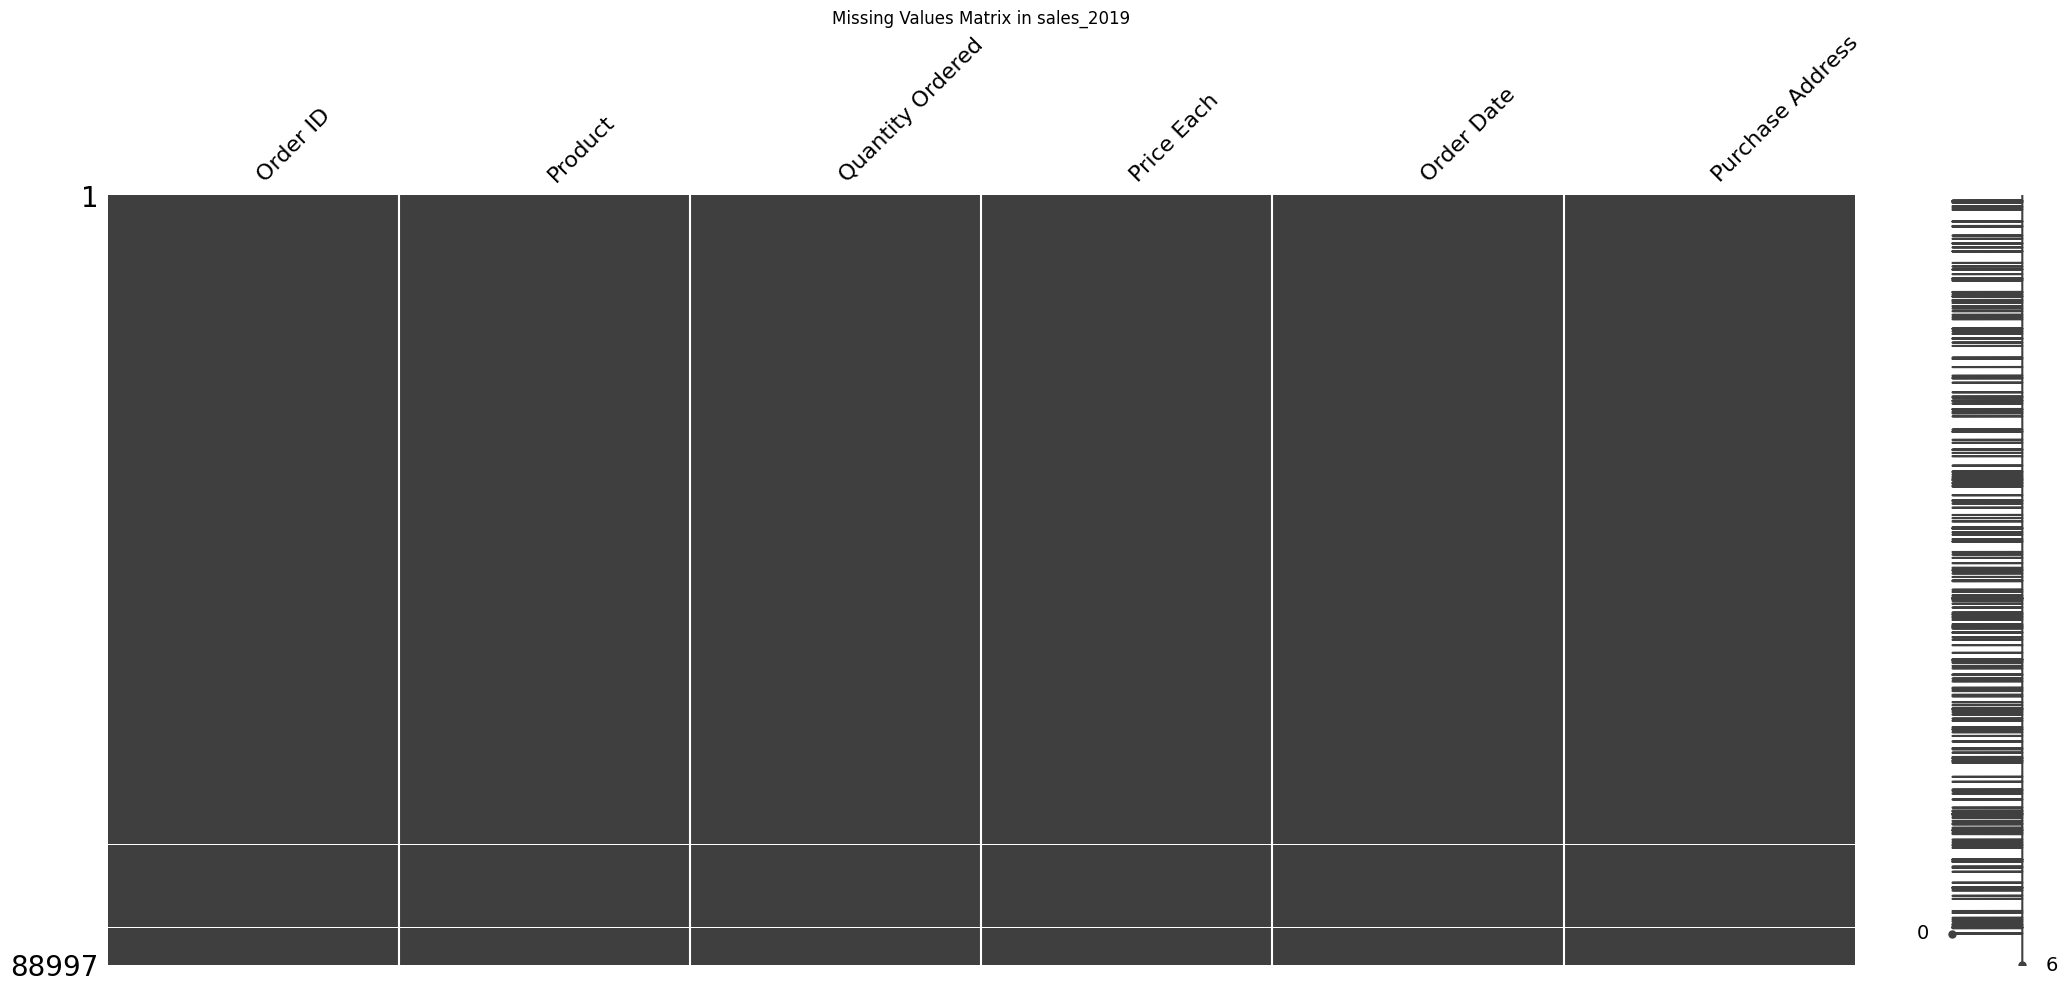

In [39]:
msno.matrix(sales_2019)

# Set plot title
plt.title('Missing Values Matrix in sales_2019')

# Show the plot
plt.show()

In [26]:
sales_2019.isna().sum()

Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

In [32]:
# Check the number of rows in the DataFrame
num_rows = sales_2019.shape[0]
print(num_rows)

88997


In [40]:
#drop null values
sales_2019_cleaned = sales_2019.dropna()
#recheck null values
sales_2019_cleaned.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

*checking for Duplicates*

In [41]:
duplicates =sales_2019_cleaned.duplicated()
count_duplicated = duplicates.sum()
print(count_duplicated)

273


In [42]:
#rechecking duplicated data 
duplicated_rows = sales_2019_cleaned[duplicates]
duplicated_rows.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3115,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3247,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3612,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3623,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4126,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"


In [43]:
#removing duplicated rows
# Assuming sales_2019_cleaned is your DataFrame without missing values
sales_2019_df = sales_2019_cleaned.drop_duplicates()

# Display the DataFrame without duplicated rows
sales_2019_df.duplicated().sum()

0

*checking for dataset datatypes*

In [49]:
sales_2019_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [55]:
sales_2019_df['Price Each'].unique(), sales_2019_df['Order Date'].unique(),sales_2019_df['Product'].unique(),sales_2019_df['Quantity Ordered'].unique(),sales_2019_df['Order ID'].unique(),sales_2019_df['Purchase Address'].unique(),sales_2019_df['Order Date'].unique()

(array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
        '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
        '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
        '300.0', '1700.0', 2.990000009536743, 11.989999771118164, 150.0,
        11.949999809265137, 300.0, 389.989990234375, 379.989990234375,
        149.99000549316406, 3.8399999141693115, 109.98999786376953,
        99.98999786376953, 14.949999809265137, 600.0, 999.989990234375,
        700.0, 1700.0, 400.0], dtype=object),
 array(['01/22/19 21:25', '01/28/19 14:15', '01/17/19 13:33', ...,
        '2019-12-19 07:48:00.0000000', '2019-12-19 00:18:00.0000000',
        '2019-12-19 21:09:00.0000000'], dtype=object),
 array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
        '27in FHD Monitor', 'AAA Batteries (4-pack)',
        '27in 4K Gaming Monitor', 'USB-C Charging Cable',
        'Bose SoundSport Headphones', 'Apple Airpods Headphones',
        'Macbook Pro Lap

In [56]:
#removing the row with column names as data entries
rows_with_column_names = sales_2019_df[sales_2019_df.isin(sales_2019_df.columns).any(axis=1)]

# Remove rows where column names appear as data entries
sales_2019_df = sales_2019_df[~sales_2019_df.isin(sales_2019_df.columns).any(axis=1)]

# Display the rows with column names and the cleaned DataFrame
print("Rows with Column Names:")
print(rows_with_column_names)

print("\nDataFrame after Cleaning:")
print(sales_2019_df)

Rows with Column Names:
      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
1073  Order ID  Product  Quantity Ordered  Price Each  Order Date   

      Purchase Address  
1073  Purchase Address  

DataFrame after Cleaning:
      Order ID                     Product Quantity Ordered Price Each  \
0       141234                      iPhone                1        700   
1       141235    Lightning Charging Cable                1      14.95   
2       141236            Wired Headphones                2      11.99   
3       141237            27in FHD Monitor                1     149.99   
4       141238            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
88992   319460  Bose SoundSport Headphones                1  99.989998   
88993   319468            Wired Headphones                1      11.99   
88994   319579    Lightning Charging Cable                1      14.95   
88995   319619      

In [57]:
#changing numerical columns to floats to make them to numerical
numerical_columns = ['Quantity Ordered', 'Price Each']  # Replace with your actual column names

# Convert numerical columns to float
sales_2019_df[numerical_columns] = sales_2019_df[numerical_columns].astype(float)

# Check the data types after the conversion
print(sales_2019_df.dtypes)

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object
